In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')

In [4]:
data.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
data.shape

(5656458, 6)

In [6]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [7]:
countrycodes = data['CountryCode'].unique()
len(countrycodes)

247

In [8]:
indicators = data['IndicatorName'].unique()
len(indicators)

1344

In [9]:
years = data['Year'].unique()
len(years)

56

In [10]:
print("Year range -", min(years) ,"to", max(years))

Year range - 1960 to 2015


In [11]:
ind1 = 'CO2 emissions \(metric'
ind2 = 'USA'

mask1 = data['IndicatorName'].str.contains(ind1)
mask2 = data['CountryCode'].str.contains(ind2)

data_co2_usa = data[mask1 & mask2]

In [12]:
data_co2_usa.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


In [13]:
data_co2_usa.shape

(52, 6)

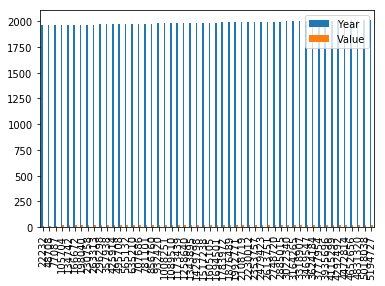

In [14]:
%matplotlib inline
data_co2_usa.plot.bar()
#data_co2_usa[:10].plot.bar()

<function matplotlib.pyplot.show(*args, **kw)>

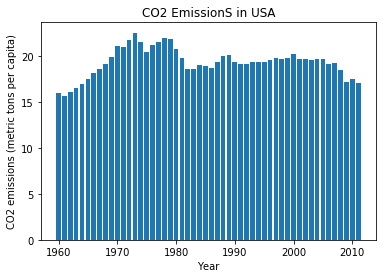

In [15]:
years = data_co2_usa['Year'].values
co2 = data_co2_usa['Value'].values

plt.bar(years, co2)

plt.xlabel('Year')
plt.ylabel(data_co2_usa['IndicatorName'].iloc[0])

plt.title('CO2 EmissionS in USA')

#plt.axis([1959, 2011,0,25])

plt.show

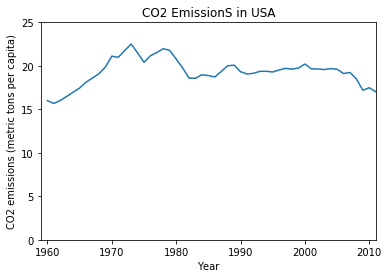

In [16]:
plt.plot(years, co2)

plt.xlabel('Year')
plt.ylabel(data_co2_usa['IndicatorName'].iloc[0])

plt.title('CO2 EmissionS in USA')

plt.axis([1959, 2011,0,25])

plt.show()

In [17]:
co2.mean(), co2.min(), co2.max(), co2.std()

(19.303472467618683, 15.6812555160569, 22.510582127233896, 1.5494080412856661)

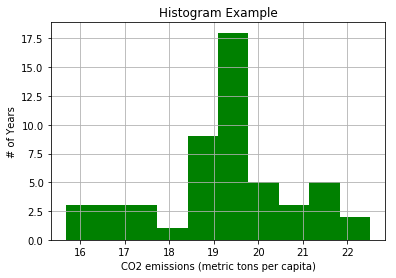

In [18]:
plt.hist(co2, 10, density =False, facecolor='green')

plt.xlabel(data_co2_usa['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

In [19]:
print(co2)

[15.99977916 15.68125552 16.0139375  16.48276215 16.96811858 17.45172525
 18.12107301 18.59831788 19.08938916 19.85794566 21.11125227 20.98020348
 21.74864198 22.51058213 21.50293038 20.40222407 21.15761537 21.53248401
 21.97300469 21.78043698 20.78648774 19.76676417 18.59049523 18.57154371
 18.97675027 18.88231274 18.72072272 19.35033442 20.01041341 20.07576978
 19.32336817 19.06223666 19.14555576 19.36346258 19.37655644 19.29565986
 19.52789051 19.71427574 19.6151546  19.74781478 20.20761476 19.65619321
 19.63919577 19.57623905 19.68358135 19.61027504 19.11613882 19.23746045
 18.48923375 17.1923791  17.48479218 17.02021634]


In [20]:
f1 =  'CO2 emissions \(metric'
f2 = 2011

mask3 = data['IndicatorName'].str.contains(f1)
mask4 = data['Year'].isin([f2])

co2_2011 = data[mask3 & mask4]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [21]:
co2_2011.shape

(232, 6)

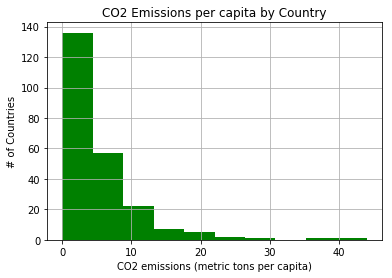

In [22]:
plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

# subplots returns a touple with the figure, axis attributes.
#fig, ax = plt.subplots()

#ax.annotate("USA",
 #           xy=(18, 5), xycoords='data',
  #          xytext=(18, 30), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                        connectionstyle="arc3"),
     #       )


plt.xlabel(co2_2011['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('CO2 Emissions per capita by Country')

plt.grid(True)

plt.show()

In [23]:
ind = 'GDP per capita \(constant 2005'
country = 'USA'

mask5 = data['IndicatorName'].str.contains(ind)
mask6 = data['CountryCode'].str.contains(country)

GDP_data = data[mask5 & mask6]
GDP_data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [25]:
GDP_data.shape

(55, 6)

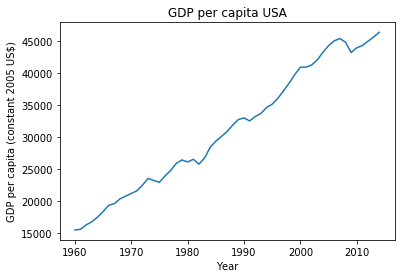

In [31]:
plt.plot(GDP_data['Year'].values, GDP_data['Value'].values)

plt.xlabel('Year')
plt.ylabel(GDP_data['IndicatorName'].iloc[0])
plt.title('GDP per capita USA')

#plt.axis([1959, 2011,0,25])

plt.show()

In [35]:
print("GDP Min Year = ", GDP_data['Year'].min(), "max: ", GDP_data['Year'].max())
print("CO2 Min Year = ", data_co2_usa['Year'].min(), "max: ", data_co2_usa['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


In [36]:
GDP_data_trunc = GDP_data[GDP_data['Year'] < 2012]
print(len(GDP_data_trunc))
print(len(data_co2_usa))

52
52


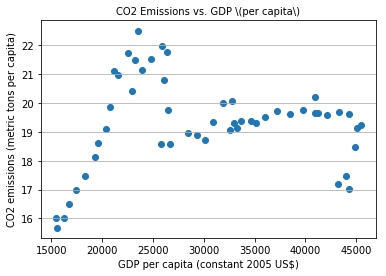

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(GDP_data_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(data_co2_usa['IndicatorName'].iloc[0],fontsize=10)

X = GDP_data_trunc['Value']
Y = data_co2_usa['Value']

axis.scatter(X, Y)
plt.show()

In [41]:
np.corrcoef(GDP_data_trunc['Value'],data_co2_usa['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])